# First Cal Example Run Through

In [6]:
%matplotlib inline
import capo.hex as hx, capo.miriad as mir, capo.red as red, capo.omni as omni
import numpy as n, pylab as p, aipy as a, glob

In [96]:
connections_file = '/Users/sherlock/src/capo/zsa/calfiles/HERA_connections.csv'
#info = hx.hera_to_info(3,128,connections=connections_file,ubls=[(80,104),(53,80)])
info = hx.hera_to_info(3,128,connections=connections_file)
reds = info.get_reds()
reds = info.get_reds()
ant_string = ','.join(map(str,info.subsetant))

times,data,flags = mir.read_files(glob.glob('/Users/sherlock/projects/hera/data/2457458/*.uvA'), '('+ant_string+')_('+ant_string+')', 'xx', verbose=True)
dataxx = {}
flagsxx = {}
for k in data.keys():
    dataxx[k] = data[k]['xx']
    flagsxx[k] = flags[k]['xx']
freqs = n.linspace(.1,.2,1024)
dlys=n.fft.fftfreq(freqs.size, freqs[1]-freqs[0])

Loading FirstCalRedundantInfo class
   Reading /Users/sherlock/projects/hera/data/2457458/zen.2457458.33396.xx.uvA


In [97]:
#run the first cal calibration
fc = omni.FirstCal(dataxx,freqs,info)
sols = fc.run()

In [98]:
dataxx_c = {}
for (a1,a2) in dataxx.keys():
    dataxx_c[(a1,a2)] = dataxx[(a1,a2)]*omni.get_phase(freqs,sols[a1])*n.conj(omni.get_phase(freqs,sols[a2]))

In [99]:
def waterfall(d, ax, mode='log', mx=None, drng=None, recenter=False, **kwargs):
    if n.ma.isMaskedArray(d): d = d.filled(0)
    if recenter: d = a.img.recenter(d, n.array(d.shape)/2)
    d = arp.data_mode(d, mode=mode)
    if mx is None: mx = d.max()
    if drng is None: drng = mx - d.min()
    mn = mx - drng
    return ax.imshow(d, vmax=mx, vmin=mn, aspect='auto', interpolation='nearest', **kwargs)

(168, 2)
14 14
(168, 2)
[[(10, 64), (43, 80), (97, 88)], [(9, 81), (22, 97), (31, 43), (53, 89), (105, 112), (20, 10), (64, 20), (88, 22), (80, 31), (104, 65)], [(31, 112), (53, 72), (65, 97), (80, 105), (104, 22), (96, 81)], [(72, 104), (112, 96)], [(9, 104), (20, 96), (22, 31), (72, 20), (97, 43), (105, 53), (81, 65), (88, 80), (112, 89)], [(22, 96), (72, 31), (112, 65), (105, 104)], [(10, 80), (97, 64)], [(65, 72), (96, 105)], [(9, 88), (10, 81), (22, 105), (31, 53), (43, 89), (53, 64), (96, 104), (97, 112), (20, 9), (89, 20), (81, 22), (65, 31), (112, 72), (104, 80)], [(9, 105), (10, 97), (20, 22), (22, 72), (64, 88), (65, 89), (81, 112), (53, 9), (43, 10), (31, 20), (96, 31), (104, 53), (80, 64), (89, 81)], [(9, 97), (64, 81), (80, 89), (88, 112), (53, 10), (104, 43)], [(10, 31), (20, 80), (22, 64), (43, 96), (72, 88), (89, 104), (112, 9), (97, 20), (81, 53)], [(10, 22), (20, 88), (31, 64), (81, 105), (89, 9), (43, 20), (65, 53), (97, 72), (96, 80)], [(88, 96), (72, 43), (105, 65)

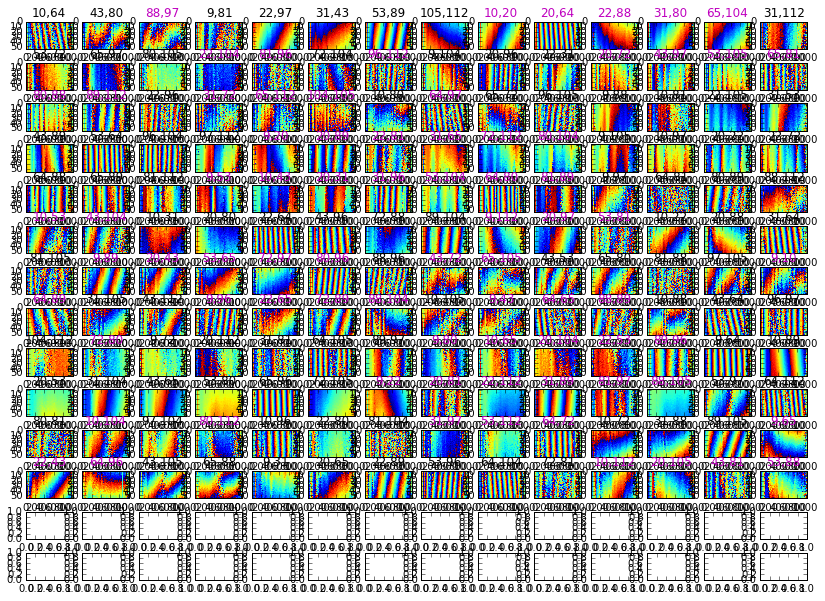

In [100]:
import capo.arp as arp
redbls = []
for r in reds: redbls += r 
redbls = n.array(redbls)
print redbls.shape
#redbls.shape = (redbls.shape[0]*redbls.shape[1],-1)
dm = divmod(len(redbls),n.floor(n.sqrt(len(redbls))))
nr,nc = int(dm[0]),int(dm[0]+n.ceil(float(dm[1])/dm[0]))
print nr,nc
fig,ax = p.subplots(nrows=nr,ncols=nc,figsize=(14,10))
print redbls.shape
print reds
for i,bl in enumerate(redbls):
    print i,bl, divmod(i,nr)
    bl = (bl[0],bl[1])
    try:
        waterfall(dataxx[bl], ax[divmod(i,nc)], mode='phs')
        ax[divmod(i,nc)].set_title('%d,%d'%(bl))
    except(KeyError):
        waterfall(dataxx[bl[::-1]], ax[divmod(i,nc)], mode='phs')
        ax[divmod(i,nc)].set_title('%d,%d'%(bl[::-1]), color='m')
        
    fig.subplots_adjust(hspace=.5)
    
#p.subplot(211);arp.waterfall(dataxx[(31, 53)], mode='phs')
#p.subplot(212);arp.waterfall(dataxx_c[31,53], mode='phs')

14 14
(168, 2)
[[(10, 64), (43, 80), (97, 88)], [(9, 81), (22, 97), (31, 43), (53, 89), (105, 112), (20, 10), (64, 20), (88, 22), (80, 31), (104, 65)], [(31, 112), (53, 72), (65, 97), (80, 105), (104, 22), (96, 81)], [(72, 104), (112, 96)], [(9, 104), (20, 96), (22, 31), (72, 20), (97, 43), (105, 53), (81, 65), (88, 80), (112, 89)], [(22, 96), (72, 31), (112, 65), (105, 104)], [(10, 80), (97, 64)], [(65, 72), (96, 105)], [(9, 88), (10, 81), (22, 105), (31, 53), (43, 89), (53, 64), (96, 104), (97, 112), (20, 9), (89, 20), (81, 22), (65, 31), (112, 72), (104, 80)], [(9, 105), (10, 97), (20, 22), (22, 72), (64, 88), (65, 89), (81, 112), (53, 9), (43, 10), (31, 20), (96, 31), (104, 53), (80, 64), (89, 81)], [(9, 97), (64, 81), (80, 89), (88, 112), (53, 10), (104, 43)], [(10, 31), (20, 80), (22, 64), (43, 96), (72, 88), (89, 104), (112, 9), (97, 20), (81, 53)], [(10, 22), (20, 88), (31, 64), (81, 105), (89, 9), (43, 20), (65, 53), (97, 72), (96, 80)], [(88, 96), (72, 43), (105, 65)], [(43, 

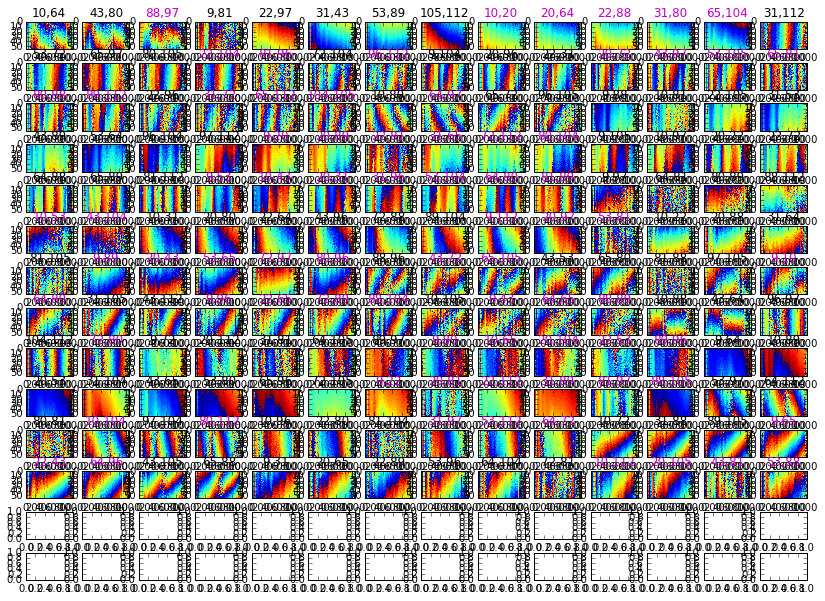

In [101]:
import capo.arp as arp
redbls = []
for r in reds: redbls += r 
redbls = n.array(redbls)
#redbls.shape = (redbls.shape[0]*redbls.shape[1],-1)
dm = divmod(len(redbls),n.floor(n.sqrt(len(redbls))))
nr,nc = int(dm[0]),int(dm[0]+n.ceil(float(dm[1])/dm[0]))
print nr,nc
fig,ax = p.subplots(nrows=nr,ncols=nc,figsize=(14,10))
print redbls.shape
print reds
for i,bl in enumerate(redbls):
    print i,bl, divmod(i,nr)
    bl = (bl[0],bl[1])
    try:
        waterfall(dataxx_c[bl], ax[divmod(i,nc)], mode='phs')
        ax[divmod(i,nc)].set_title('%d,%d'%(bl))
    except(KeyError):
        waterfall(dataxx_c[bl[::-1]], ax[divmod(i,nc)], mode='phs')
        ax[divmod(i,nc)].set_title('%d,%d'%(bl[::-1]), color='m')
        
fig.subplots_adjust(hspace=.5)
    